In [1]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Scikit-learn imports
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, classification_report, balanced_accuracy_score)
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.compose import ColumnTransformer

# Imbalanced-learn imports
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Use Python to extract the .csv from the .zip:
import zipfile
import os


In [2]:
zip_files = ['SpotifyAudioFeaturesApril2019.csv.zip', 'SpotifyAudioFeaturesNov2018.csv.zip']
csv_files = ['SpotifyAudioFeaturesApril2019.csv', 'SpotifyAudioFeaturesNov2018.csv']

# Unzip each file
for zip_file, csv_file in zip(zip_files, csv_files):
    if not os.path.exists(csv_file):  # Only unzip if the CSV file doesn't already exist
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall()  # Extract the files to the current directory
        print(f"Extracted {csv_file}")
    else:
        print(f"{csv_file} already exists, skipping extraction.")

# Read the CSV files into pandas DataFrames
df2 = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')
df1 = pd.read_csv('SpotifyAudioFeaturesNov2018.csv')

# Show the first few rows of each DataFrame
print("April 2019 Data:")
display(df2.head(3))

print("\nNovember 2018 Data:")
display(df1.head(3))


SpotifyAudioFeaturesApril2019.csv already exists, skipping extraction.
SpotifyAudioFeaturesNov2018.csv already exists, skipping extraction.
April 2019 Data:


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.0,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.02500,0.603,138913,0.723,0.0,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56



November 2018 Data:


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.0,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.02500,0.603,138913,0.723,0.0,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63


In [3]:
import pandas as pd

# Load the dataframes
df1 = pd.read_csv('SpotifyAudioFeaturesNov2018.csv')
df2 = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')

# Combine the dataframes
df = pd.concat([df1, df2], ignore_index=True)

# Display the shape of the combined dataframe
print(f"Combined dataframe shape: {df.shape}")


Combined dataframe shape: (247035, 17)


In [4]:
# Remove duplicates based on 'track_id'
df.drop_duplicates(subset='track_id', inplace=True)
print(f"Dataframe shape after removing duplicates: {df.shape}")

Dataframe shape after removing duplicates: (130989, 17)


In [5]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
artist_name         0
track_id            0
track_name          1
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64


In [6]:
# Drop irrelevant columns
df.drop(columns=['track_id', 'track_name', 'artist_name'], inplace=True)

In [7]:
# Reset index
df.reset_index(drop=True, inplace=True)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


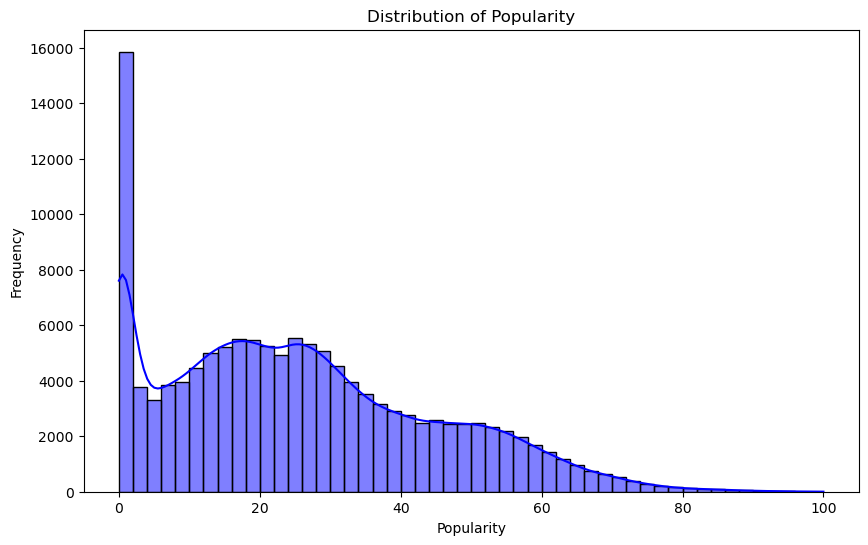

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=50, kde=True, color='blue')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


In [9]:
# Remove songs with zero popularity
df = df[df['popularity'] > 0]
df.reset_index(drop=True, inplace=True)
print(f"Dataframe shape after removing zero popularity songs: {df.shape}")


Dataframe shape after removing zero popularity songs: (117820, 14)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


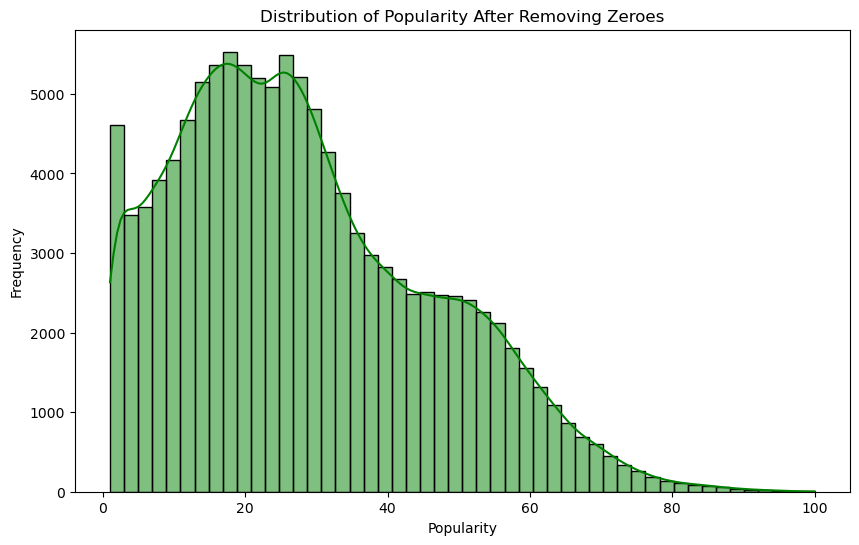

In [10]:
# Plot the distribution again
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=50, kde=True, color='green')
plt.title('Distribution of Popularity After Removing Zeroes')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


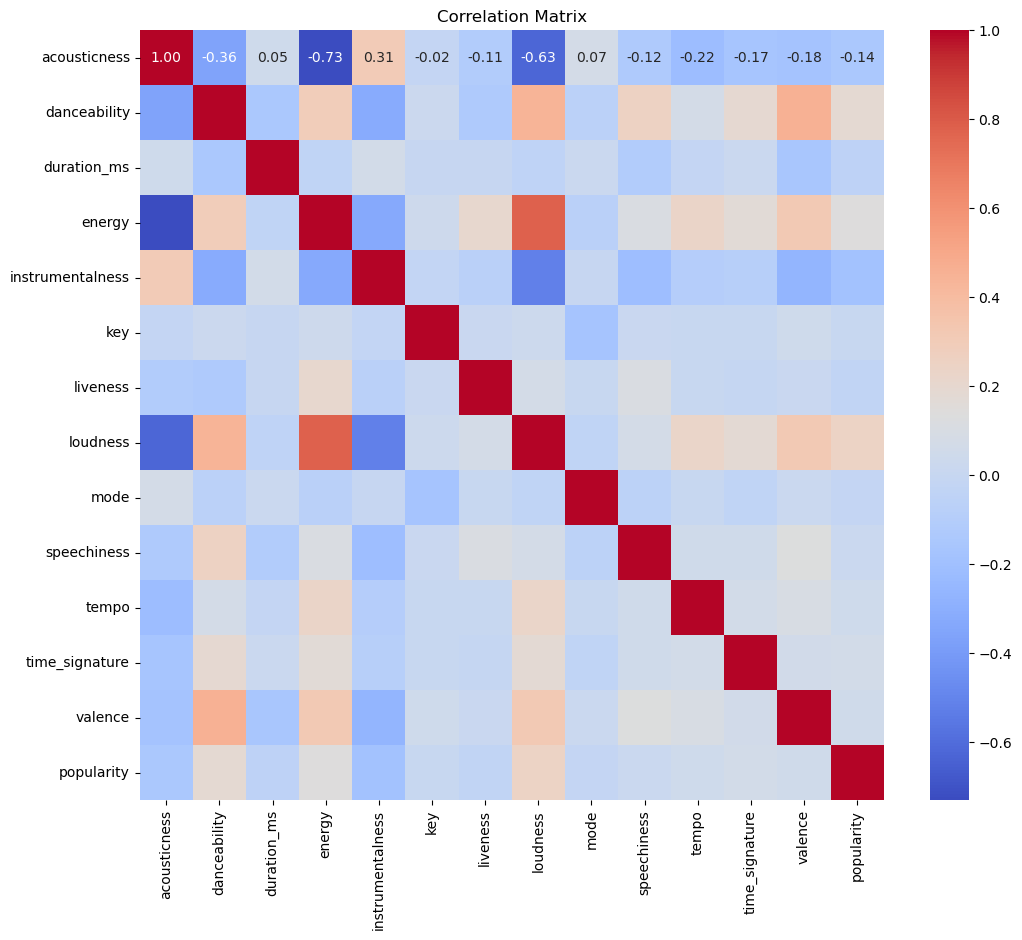

In [11]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [12]:
# Drop less relevant features
df.drop(columns=['key', 'mode', 'time_signature'], inplace=True)


In [13]:
# Features (X) and target variable (y)
X = df.drop('popularity', axis=1)
y = df['popularity']


In [14]:
feature_names = X.columns.tolist()


In [15]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
from sklearn.neural_network import MLPRegressor

# Initialize the MLPRegressor
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42,
)

# Train the model
mlp.fit(X_train_scaled, y_train)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 32), random_state=42)

In [18]:
# Predict on the test set
y_pred = mlp.predict(X_test_scaled)


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R-squared Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")


Mean Absolute Error: 13.35
Root Mean Squared Error: 16.64
R-squared Score: 0.1315


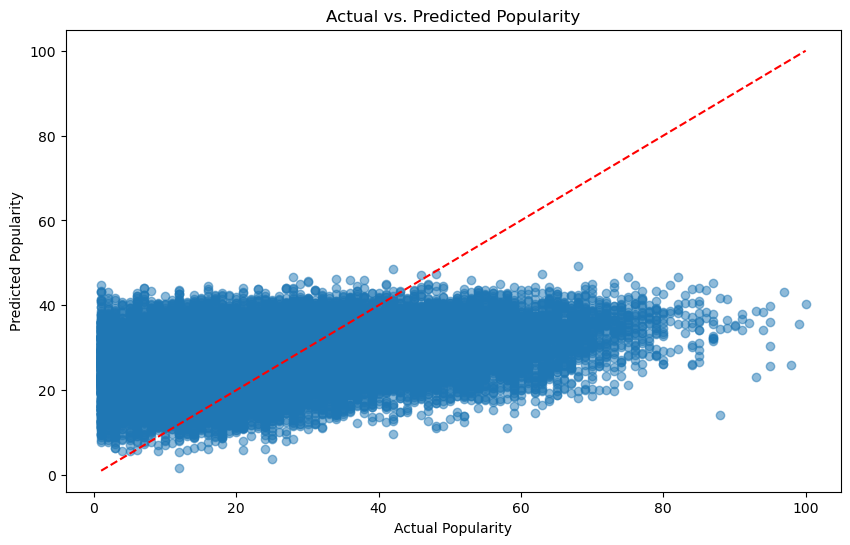

In [20]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs. Predicted Popularity')
plt.show()
